# Equações Não lineares e Raízes

Muitas das equações que temos em física não são lineares. Diversos problemas que temos interesse em resolver são representados por equações não lineares. Essas equações em geral são mais trabalhosas de serem tratadas numericamente. Aqui mostraremos algumas técnicas para a solução desse tipo de equação.



Dada uma função f contínua e real, queremos encontrar uma solução x tal que satisfaça a equação não linear:

$$ f(x) = 0 $$

De modo geral podemos conceber o procedimento de busca da solução em 3 etapas:

 - encontrar uma região onde possam existir soluções da equação e se possível, isolar os intervalos que contém apenas 1 solução;
 - dado um intervalo de interesse com uma solução, determinar uma aproximação inicial $x_{0}$ da solução para cada intervalo;
 - a partir da aproximação inicial, usar uma sequência $x_n$ que em principio deve convergir para a solução.

de um modo geral os métodos usados são iterativos.

## Método do ponto fixo

Para detalhes sobre este método leia: https://pt.wikipedia.org/wiki/Itera%C3%A7%C3%A3o_de_ponto_fixo

Resumidamente, este método consiste em re-escrever a função de interesse de modo que tenhamos uma expressão na forma $u(x)=x$.

Por exemplo, considere $f(x)=2-x-e^{-x}$. Podemos re-escrever a expreção como:

$$ x = 2-e^{-x} $$

Antes de iniciar o procedimento iterativo, vamos analisar a função graficamente:

(-5.0, 5.0)

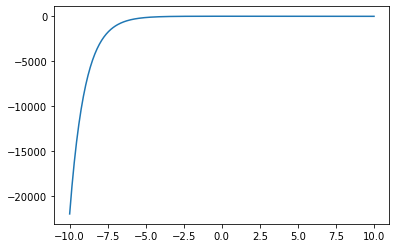

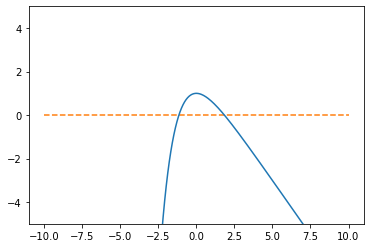

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2-x-np.exp(-x)

x = np.linspace(-10, 10, 400)
y = f(x)

plt.figure()
plt.plot(x, y)

# melhorando a escala para visualizar as possíveis raízes
plt.figure()
plt.plot(x, y)
plt.hlines(0,x.min(),x.max(),colors='C1',linestyles='dashed')
plt.ylim(-5,5)

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


(-5.0, 5.0)

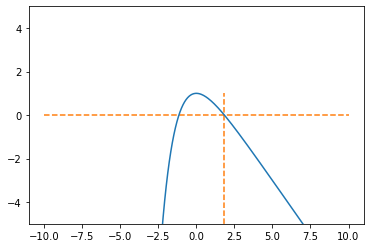

In [30]:
# implementação numérica do ponto fixo

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2-x-np.exp(-x)

xplot = np.linspace(-10, 10, 400)
yplot = f(xplot)

# chute inicial para metodo iterativo
x = 1

for i in range(10):
    x = 2 - np.exp(-x)
    print(x)
    
# faz um gráfico para mostrar a solução
plt.figure()
plt.plot(xplot, yplot)
plt.hlines(0,xplot.min(),xplot.max(),colors='C1',linestyles='dashed')
plt.vlines(x,yplot.min(),yplot.max(),colors='C1',linestyles='dashed')
plt.ylim(-5,5)

Note que a função tem duas raízes no entanto, por este método não temos como convergir para a raíz negativa. Uma alternativa é obter maneiras distintas de escrever a expressão $u(x)=x$. No caso de nosso exemplo podemmos fazer:

$$ x = -ln(2-x) $$

-1.0986122886681098
-1.130954362449719
-1.1413378662079252
-1.1446487812179849
-1.1457022086278554
-1.1460371430127312
-1.1461436109912895
-1.1461774523517752
-1.1461882087515665
-1.1461916276246487


(-5.0, 5.0)

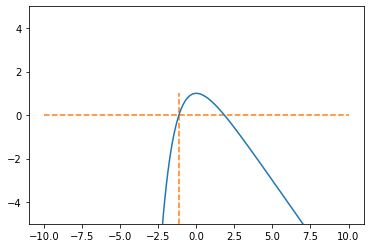

In [32]:
# implementação numérica do ponto fixo com expressão alternativa

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2-x-np.exp(-x)

xplot = np.linspace(-10, 10, 400)
yplot = f(xplot)

# chute inicial para metodo iterativo
x = -1

for i in range(10):
    x = -np.log(2-x)
    print(x)
    
# faz um gráfico para mostrar a solução
plt.figure()
plt.plot(xplot, yplot)
plt.hlines(0,xplot.min(),xplot.max(),colors='C1',linestyles='dashed')
plt.vlines(x,yplot.min(),yplot.max(),colors='C1',linestyles='dashed')
plt.ylim(-5,5)

http://docs.scipy.org/doc/scipy/reference/optimize.html

## Método da Bisecção

Um dos métodos mais simples para se encontrar raízes de equações é o método da bisecção. O algoritmo pode ser usado para qualquer função contínua em um intervalo em que o valor da função muda de sinal. A ideia básica é: 1) divida o intervalo em duas partes; 2) cheque em que parte ocorre a mudança de sinal e 3) repita até atingir precisão desejada.

Este metodo não produz uma solução exata e o erro cometido é relacionado ao tamanho dos intervalos após $N$ divisões:

$$\left| \ x_{\text{real}} - x_N \, \right| \leq \frac{b-a}{2^{N+1}}$$

Veja mais detalhes aqui: https://pt.wikipedia.org/wiki/M%C3%A9todo_da_bisse%C3%A7%C3%A3o





In [4]:
import numpy as np

def f(x):
    return x**2 - x - 1

# definir intervalo inicial
a = 1.0
b = 2.0

# checa se existe raiz dentro do intervalo inicial
if f(a)*f(b) >= 0:
    print("não existe raiz no intervalo inicial.")

a_n = a
b_n = b

N = 10                      # numero de iterações

for n in range(N):
    
    m_n = (a_n + b_n)/2     # ponto médio do intervalo N
    
    f_m_n = f(m_n)          # valor da função f(x) no ponto médio
    
    if f(a_n)*f_m_n < 0:
        a_n = a_n
        b_n = m_n
    
    elif f(b_n)*f_m_n < 0:
        a_n = m_n
        b_n = b_n
        
    else:
        print("não foi encontrada raiz.")
        
print('A raiz encontrada foi: %8.6f +/- %8.6f'%(m_n,(b-a)/2**(N+1)))


A raiz encontrada foi: 1.618164 +/- 0.000488


## Método de Newton–Raphson

É um outro método bastante conhecido e usado para encontrar raízes. É um dos métodos mais rápidos no entanto não há como garantir a convergência para uma solução.
Basicamente o método consiste em buscar a raíz a partir de um valor inicial $x_0$ para o qual se calcula a equação da reta tangente usando derivada.
Usamos o fato de que para uma dada função $f(x)$ o coeficente da reta tangente no ponto $x_0$ é $f'(x_0)$. Com isso podemos escrever:

sendo $y=ax+b$ obtemos $y = f(x_0) + f'(x_0)(x - x_0)$. Como queremos achar uma aproximação para a raíz precisamos achar o ponto em que essa reta intersecta com o eixo $x$ fazendo $y=0$. Com isso obtemos: $ x = x_0 - \frac{f(x_0)}{f'(x_0)}$

Para achar a raíz repetimos este procedimento até que $f(x_0)$ seja proxima o suficinet de zero. A formula de recorrencia é então dada por:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Para uma descrição mais detalhada do método veja:

https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson

Vejamos um exemplo abaixo
    

In [7]:
# Exemplo de aplicação do método de Newton–Raphson

import numpy as np

def f(x):
    return x**2 - x - 1

def df(x):
    return 2*x - 1

#definina o ponto inicial x_0
x0 = 1.

# defina a tolerancia com a qual a raiz será determinada
eps = 1.0e-3

x = x0
count=0
while abs(f(x)) > eps:
    x = x - f(x)/df(x)
    print('solution for iteration %i is %f'%(count,x))
    count += 1
    


solution for iteration 0 is 2.000000
solution for iteration 1 is 1.666667
solution for iteration 2 is 1.619048
solution for iteration 3 is 1.618034
